In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset = pd.read_csv('../input/online-shoppers-intention/online_shoppers_intention.csv')
dt = dataset
array = dt.values
X = array[ : , 0:9]
Y = array[ : , 9]
X2 = array[ : , 11:14]
Y2 = array[ : , 11:14]
X3 = array[ : , 15:17]
X

# Importar CSV

In [19]:
"""Cargamos el dataset"""
dataset = pd.read_csv('Datasets/online_shoppers_intention.csv')
dt = dataset

# Visualizacion de los datos

In [20]:
"""Dimensiones del dataset"""
dt.shape

(12330, 18)

In [21]:
"""Los primeros 20 datos de la tabla"""
dt.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [40]:
"""Vemos cuantas clases False y True hay en la columna a predecir"""
RevenueClass = dt['Revenue'].value_counts()
RevenueClass

False    10422
True      1908
Name: Revenue, dtype: int64

In [23]:
"""Resumen del set de datos"""
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [24]:
"""Vemos si no hay datos corruptos"""
dt.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [25]:
"""Usamos describe para revisar los valores de los datos"""
dt.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


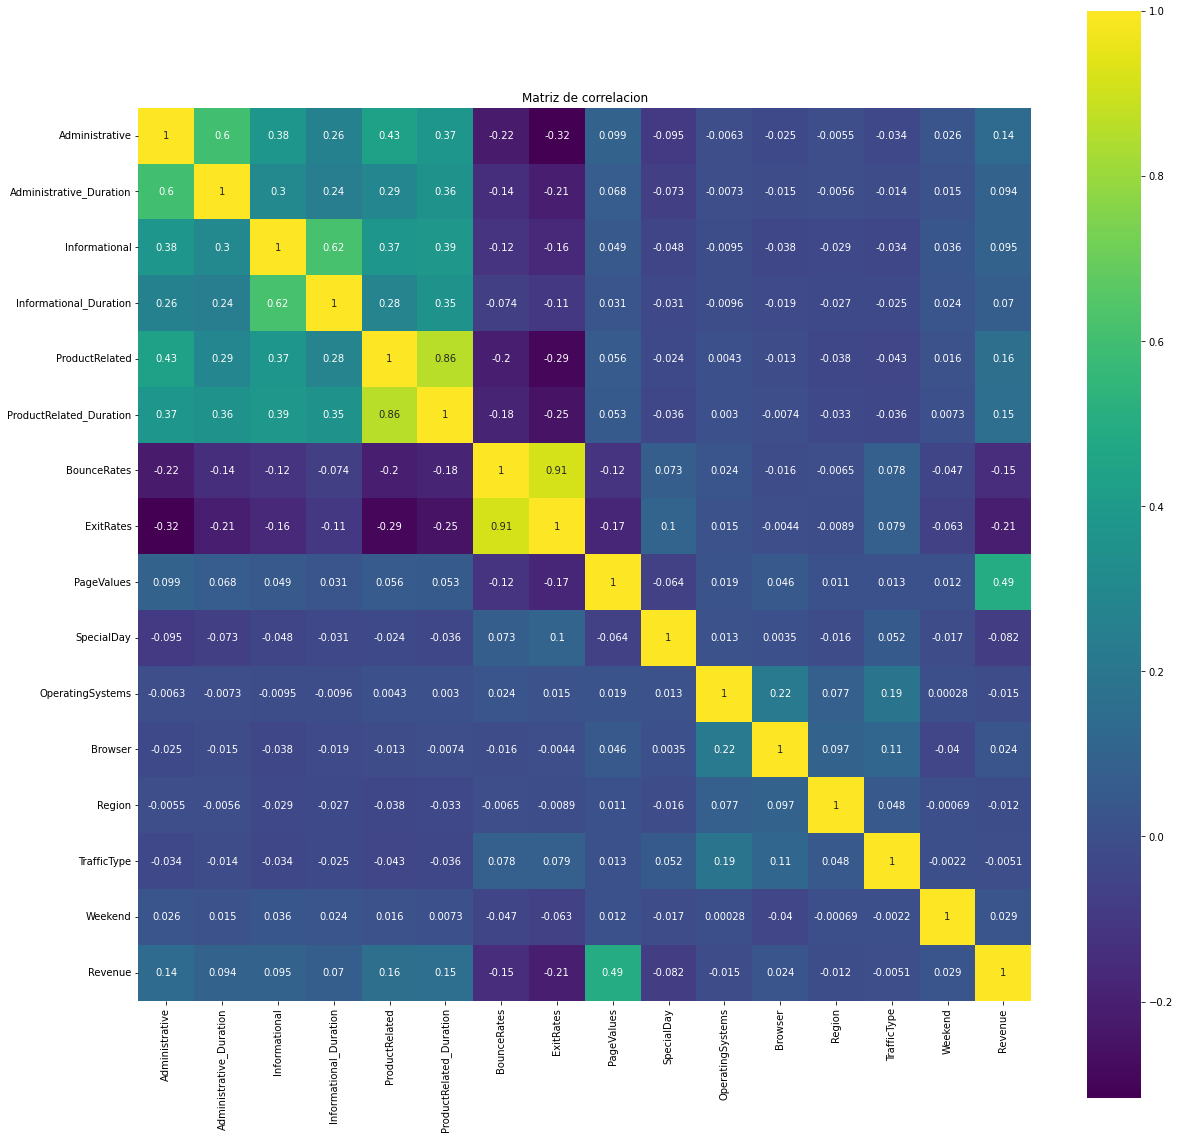

In [26]:
"""Vemos la correlacion de los datos"""
cor = dt.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

In [27]:
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


C:\Users\Stefano\AppData\Local\Temp\ipykernel_4392\611657703.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dt.hist(ax = ax)


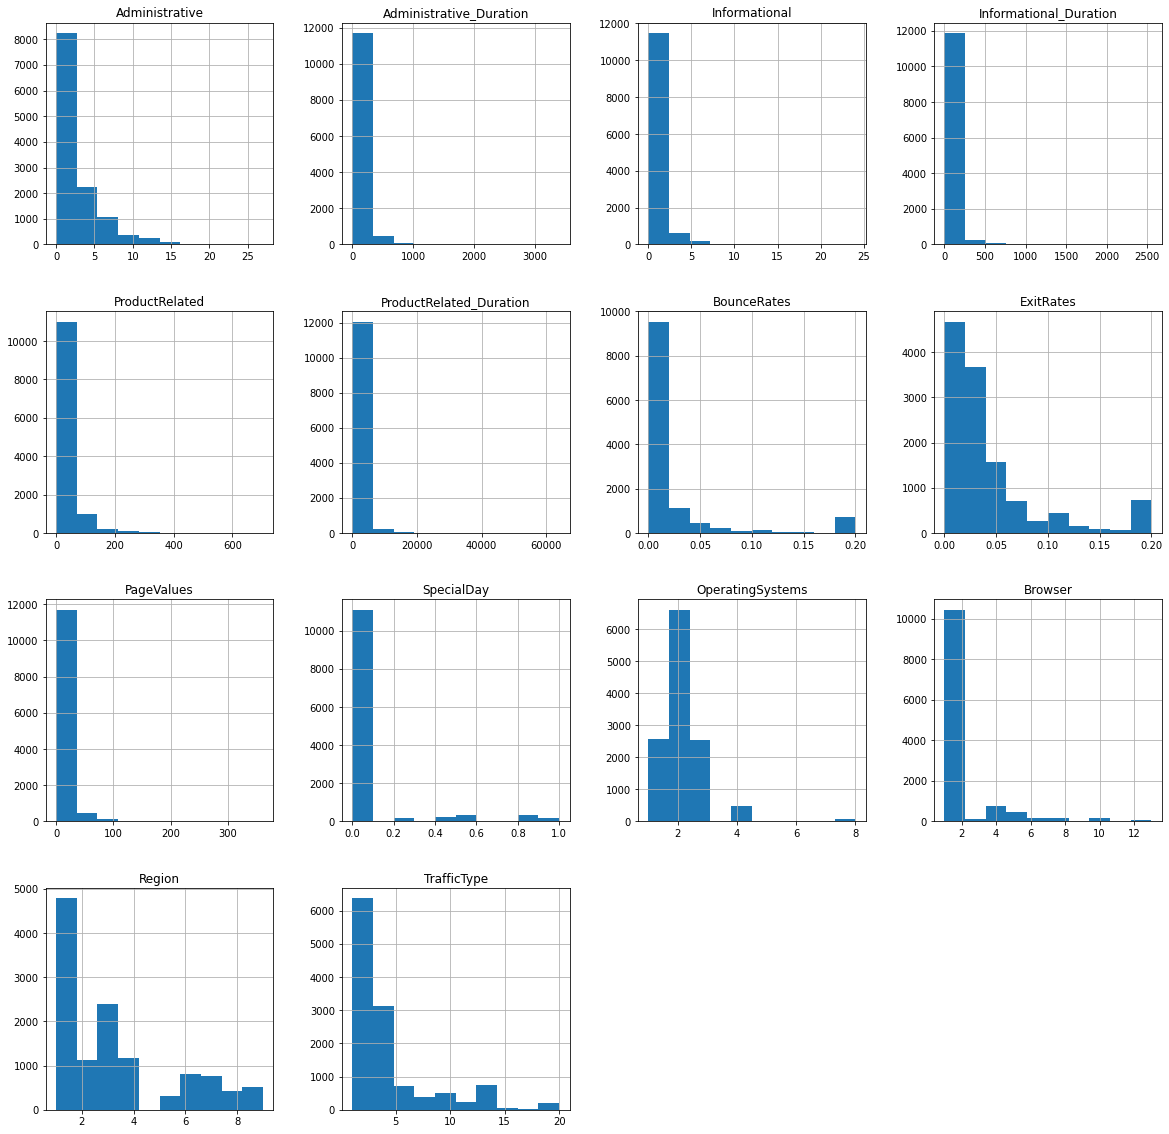

In [28]:
"""Distribucion de los datos"""
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

# Preprocesamiento

In [29]:
"""Eliminamos Month y VisitorType"""
MVD = dt.drop(columns = ['Month', 'VisitorType'])

In [30]:
"""Transformamos los datos a numericos"""
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
MVD['Weekend'] = encoder.fit_transform(MVD['Weekend'])
MVD['Revenue'] = encoder.fit_transform(MVD['Revenue'])

In [31]:
"""Pasamos nuestros datos a un array"""
array = MVD.values
X = array[:, 0:15]
Y = array[:, 15]

In [32]:
"""Balanceamos las clases"""
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y)

In [33]:
"""Preprocesamos los datos"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescalerX = scaler.fit_transform(X_resampled)

estandar = StandardScaler().fit(rescalerX)
estandarX = estandar.transform(rescalerX)

X_clas = estandarX

# Modelado

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split



"""Creamos una lista y metemos cada uno de los modelos a usar"""
models = []
models.append(('LoR', LogisticRegression(solver="lbfgs", max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LoR', LogisticRegression()))
models.append(('CAR', DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
scoring = 'accuracy'
"""Creamos un bucle que recorra la lista de modelos y nombres"""
for name, model in models:
    """Entrenamos nuestro modelo"""
    kfold = KFold(n_splits=10)
    """Calculamos el porcentaje de la prediccion"""
    result =  cross_val_score(model, X_clas, y_resampled,  cv=kfold)
    results.append(result)
    names.append(name)
    print(f"{name}: {result.mean()*100.0:,.2f} ({result.std()*100.0:,.2f})")



LoR: 79.77 (8.51)
LDA: 69.35 (6.44)
KNN: 85.65 (8.22)
LoR: 79.77 (8.51)
CAR: 94.94 (4.31)
NB: 72.70 (7.69)
SVM: 82.61 (5.69)


In [86]:
"""Usamos DecisionTreeClassifier para la prediccion"""
X_train, X_test, y_train, y_test = train_test_split(X_clas, y_resampled, test_size=0.40 )
svc = DecisionTreeClassifier(criterion = "entropy")
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
cohen_score = cohen_kappa_score(y_test, predicted)
print(f"Cohens Score: {cohen_score*100.0:,.2f}")

Cohens Score: 87.71


# Resultados

In [87]:
"""Usamos la matriz de confuncion para ver los resultados del modelo"""
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[3676  464]
 [  48 4150]]


In [93]:
dataframe1 = pd.DataFrame(predicted, columns = ["Predicted"])

In [94]:
DataPredicted = dataframe1['Predicted'].value_counts()


Text(0.5, 1.0, 'Intencion de compra')

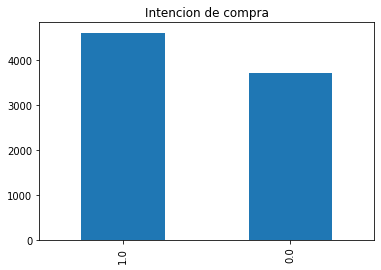

In [96]:
"""Ploteamos un grafico de barras para observar los datos"""
ax = plt.subplots()
DataPredicted.plot.bar()
plt.title('Intencion de compra')

# Conclusion

Como conclusion podemos decir que al predecir la intencion de compra el algoritmo que mas porcentaje de accuracy arroja es el de "KNeighborsClassifier" coun un 85% de acierto, "DecisionTreeClassifier" con un 94% y el "SVC" con un 82% son los algoritmos que mejor se adaptan.

Tambien al realizar la practicamos pudimos ver que los principales datos que tienen mayor influencia en es el PageValues y los que menos influencian al cliente a comprar son el ExitRates y BonusRates